#Perkenalan

'''

=================================================

Milestone 1

Nama  : Ahmad Qais Alfiansyah
Batch : RMT-026

Saya mendapatkan sebuah project dari sebuah perusahaan Airline di Amerika. Satu tahun belakangan banyak komplain dari konsumen yang merupakan konsumen loyal sebagai member di perusahaan mereka terkait kualitas *in-flight F&B *.

Mereka menargetkan skor kepuasan konsumen lebih sepesifiknya member bisnis mereka terhadap kualitas F&B mereka kembali di atas 4.5 pada Semester 2 2023 (kisah ini di akhir tahun 2022).

Mereka menginginkan saya menganalisa faktor eksternal terlebih dahulu. Mencari kemungkinan ada penyebab dari turunnya angka kepuasan konsumen, khususnya member mereka.

Sebagai langkah awal, saya akan menggunakan data milik perusahaan untuk menganalisa faktor-faktor yang mungkin menjadi penyebab turunnya skor kepuasan member mereka. Saya akan menggunakan tools OKR dengan objective:

 *Bersama dengan klien mewujudkan peningkatan kembali skor kepuasan konsumen khususnya yang telah menjadi member di atas 4.5 pada Bulan Juli 2024.*

 Key Result:
 1. Mencari tahu apakah ada kemungkinan hubungan skor kepuasan terhadap kategori jarak penerbangan. Untuk mencapai itu, sebelumnya saya harus cek terlebih dahulu:

 * Komposisi membership perusahaan mereka
 * Skor kepuasan dari setiap member
 * Mencari tahu central tendency skor kepuasan member
 * Mencari tahu central tendency skor kepuasan member berdasarkan kategori jarak
 * Mengetahui sebaran data skor kepuasan member berdasarkan kategori jarak penerbangan
 * Menguji apakah jarak penerbangan relevan dan saling terkait dengan skor kepuasan member

 2. Mencari tahu apakah ada kemungkinan hubungan erat antara skor kepuasan terhadap generasi usia member. Saya akan melakukan langkah-langkah berikut:
 * Mencari tahu komposisi member berdasarkan generasi usia
 * Menghitung persentase tiap skor kepuasan berdasarkan generasi
 * Mencari rata-rata skor kepuasan member dari setiap generasi per harinya
 * Mencari central tendency kepuasan member berdasarkan generasi
 * Menguji apakah benar terdapat hubungan kuat antara generasi dengan skor kepuasan  

=================================================

'''

In [133]:
# import data csv klien
import pandas as pd
url = ('https://raw.githubusercontent.com/qaisahmaddd/rmt026/main/Survey%20data_Inflight%20Satisfaction%20Score.csv')
df = pd.read_csv(url)

df

,flight_number,origin_station_code,destination_station_code,record_locator,scheduled_departure_date,question_text,score,satisfaction_type,driver_sub_group1,driver_sub_group2,...,equipment_type_code,ua_uax,actual_flown_miles,haul_type,departure_gate,arrival_gate,international_domestic_indicator,response_group,media_provider,hub_spoke
0,3802,MKX,ORX,CYXXJJ,9/1/2022,How satisfied were you with the food & beverag...,2,Dissatisfied,food & beverage,food and beverage satisfaction,...,CRZ,UAX,67,Short,C12,F10,Domestic,non-member,NaN,spoke departure
1,4645,COX,DEX,DRXXMH,9/1/2022,How satisfied were you with the food & beverag...,5,Satisfied,food & beverage,food and beverage satisfaction,...,E75,UAX,72,Short,5,B60,Domestic,member,GOGO,spoke departure
2,5236,COX,DEX,DEXXS1,9/1/2022,How satisfied were you with the food & beverag...,5,Satisfied,food & beverage,food and beverage satisfaction,...,E75,UAX,72,Short,7,A71,Domestic,member,GOGO,spoke departure
3,4686,DEX,COX,PXXXLH,9/1/2022,How satisfied were you with the food & beverag...,3,Dissatisfied,food & beverage,food and beverage satisfaction,...,CRJ,UAX,72,Short,B82,5,Domestic,member,NaN,hub departure
4,671,DEX,COX,KZXXH5,9/1/2022,How satisfied were you with the food & beverag...,5,Satisfied,food & beverage,food and beverage satisfaction,...,19F,UA,72,Short,B24,3,Domestic,member,PANASONIC,hub departure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47069,2,SFX,SIX,IPXXM3,9/30/2022,How satisfied were you with the food & beverag...,4,Satisfied,food & beverage,food and beverage satisfaction,...,78P,UA,8440,Long,G9,F52,International,non-member,PANASONIC,hub departure
47070,2,SFX,SIX,O5XXK4,9/30/2022,How satisfied were you with the food & beverag...,4,Satisfied,food & beverage,food and beverage satisfaction,...,78P,UA,8440,Long,G9,F52,International,member,PANASONIC,hub departure
47071,3,SIX,SFX,G8XX3W,9/30/2022,How satisfied were you with the food & beverag...,1,Dissatisfied,food & beverage,food and beverage satisfaction,...,78P,UA,8440,Long,F52,G2,International,member,PANASONIC,spoke departure
47072,3,SIX,SFX,G8XX3W,9/30/2022,What item did you choose?,chicken entrée,NaN,food & beverage,comp,...,78P,UA,8440,Long,F52,G2,International,member,PANASONIC,spoke departure


In [135]:
# Cek apakah data sudah dibaca dengan baik, dan cek ada insight apa dari sini?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47074 entries, 0 to 47073
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   flight_number                     47074 non-null  int64 
 1   origin_station_code               47074 non-null  object
 2   destination_station_code          47074 non-null  object
 3   record_locator                    47074 non-null  object
 4   scheduled_departure_date          47074 non-null  object
 5   question_text                     47074 non-null  object
 6   score                             47074 non-null  object
 7   satisfaction_type                 34963 non-null  object
 8   driver_sub_group1                 47074 non-null  object
 9   driver_sub_group2                 47074 non-null  object
 10  arrival_delay_minutes             47074 non-null  int64 
 11  arrival_delay_group               47074 non-null  object
 12  cabin_code_desc   

menurut saya data sangat kompleks dan tidak semuanya relvan, jadi saya akan coba ambil bagian-bagian yang akan membantu saya mencapai objektif

In [136]:
# Memilah hanya kolom yang dibutuhkan sekaligus merubah urutan kolom
df = df[['flight_number', 'scheduled_departure_date', 'actual_flown_miles', 'haul_type',
          'international_domestic_indicator', 'generation', 'response_group', 'score'
]]

In [137]:
# Simpan file sebagai csv baru, agar tidak ada peringatan as copy ke depannya
df.to_csv('curated_survey_satisfaction_score.csv', index=False)

# Mendifinikasikan dataframe dengan file csv baru
path = ('/content/curated_survey_satisfaction_score.csv')
df = pd.read_csv(path)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47074 entries, 0 to 47073
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   flight_number                     47074 non-null  int64 
 1   scheduled_departure_date          47074 non-null  object
 2   actual_flown_miles                47074 non-null  int64 
 3   haul_type                         47074 non-null  object
 4   international_domestic_indicator  47074 non-null  object
 5   generation                        47074 non-null  object
 6   response_group                    47074 non-null  object
 7   score                             47074 non-null  object
dtypes: int64(2), object(6)
memory usage: 2.9+ MB


ok, dari sini saya akan coba membuat data dengan tipe semestinya, menganti nama kolom supaya lebih mudah dibaca tim internal saya, dan mencari apakah ada data-data yang *miss value*

In [138]:
# Ganti data type dari scheduled departure date
df['scheduled_departure_date'] = pd.to_datetime(df['scheduled_departure_date'])
# Buat kolom baru, bulan dan tanggal jika nanti dibutuhkan
df['month'] = pd.DatetimeIndex(df['scheduled_departure_date']).month
df['date'] = pd.DatetimeIndex(df['scheduled_departure_date']).day

In [139]:
# Ganti nama kolom supaya lebih ringkas dan mudah dipahami
# Terminologi 'Membership' tidak boleh diganti oleh tim marketing klien
df = df.rename(columns = {'flight_number' : 'nomor_penerbangan',
                          'scheduled_departure_date' : 'jadwal_keberangkatan',
                          'month' : 'bulan',
                          'date' : 'tanggal',
                          'haul_type' : 'kategori_jarak',
                          'actual_flown_miles' : 'jarak_penerbangan',
                          'international_domestic_indicator' : 'jenis_tujuan',
                          'generation' : 'generasi',
                          'response_group' : 'membership' ,  'score' : 'skor_kepuasan'
                          })
# Semua kolom diurutkan ulang
df = df[['nomor_penerbangan', 'jadwal_keberangkatan', 'bulan', 'tanggal', 'kategori_jarak',
         'jarak_penerbangan', 'jenis_tujuan', 'generasi', 'membership', 'skor_kepuasan'
]]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47074 entries, 0 to 47073
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   nomor_penerbangan     47074 non-null  int64         
 1   jadwal_keberangkatan  47074 non-null  datetime64[ns]
 2   bulan                 47074 non-null  int64         
 3   tanggal               47074 non-null  int64         
 4   kategori_jarak        47074 non-null  object        
 5   jarak_penerbangan     47074 non-null  int64         
 6   jenis_tujuan          47074 non-null  object        
 7   generasi              47074 non-null  object        
 8   membership            47074 non-null  object        
 9   skor_kepuasan         47074 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 3.6+ MB


Dikarenakan terdapat value selain angka, saya akan menghapus baris yang berisi selain angka dalam kolom skor_kepuasan

In [140]:
df = df[df['skor_kepuasan'].str.isnumeric()]

In [141]:
df['skor_kepuasan'] = df['skor_kepuasan'].astype(int)

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34963 entries, 0 to 47071
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   nomor_penerbangan     34963 non-null  int64         
 1   jadwal_keberangkatan  34963 non-null  datetime64[ns]
 2   bulan                 34963 non-null  int64         
 3   tanggal               34963 non-null  int64         
 4   kategori_jarak        34963 non-null  object        
 5   jarak_penerbangan     34963 non-null  int64         
 6   jenis_tujuan          34963 non-null  object        
 7   generasi              34963 non-null  object        
 8   membership            34963 non-null  object        
 9   skor_kepuasan         34963 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 2.9+ MB


Ok semua kolom dan tipe data sudah sesuai. Selanjutnya cek missing value

In [143]:
df.isnull().sum()

nomor_penerbangan       0
jadwal_keberangkatan    0
bulan                   0
tanggal                 0
kategori_jarak          0
jarak_penerbangan       0
jenis_tujuan            0
generasi                0
membership              0
skor_kepuasan           0
dtype: int64

tidak ada missing value
saya bisa lanjut ke tahap analisa

# Analisa Desktriptif

## Komposisi Membership
Menghitung komposisi berapa sampel dari data yang ada

In [144]:
# sebelumnya cek value unik dari kolom membership
kategori_membership = df['membership'].unique()
jumlah_kategori_membership = df['membership'].nunique()
print('Kategori membership dalam data ada', jumlah_kategori_membership , 'yaitu:\n' , kategori_membership)

Kategori membership dalam data ada 3 yaitu:
 ['non-member' 'member' 'NBK']


Kategori membership terbagi menjadi 2 sebetulnya. Hanya ada Member dan non-member. Atas permintaan klien, kategori NBK akan saya rubah menjadi Member

In [145]:
# atas arahan klien, kategori NBK, dianggap bukan Member
# ganti NBK menjadi Member
df['membership'] = df['membership'].str.replace('NBK','member')

Selesai.
Selanjutnya saya akan cek perbandingan Member dan non-Member

In [146]:
# perbandingan Member dan Non Member
komposisi_membership = df['membership'].value_counts()
desimal_membership = komposisi_membership / len(df)
persentase_membership = desimal_membership.map(lambda x: f"{x:.2%}")
print('Komposisi Jumlah Membership adalah:\n', komposisi_membership, '\n\nDalam persentase:\n' , persentase_membership)

Komposisi Jumlah Membership adalah:
 member        25529
non-member     9434
Name: membership, dtype: int64 

Dalam persentase:
 member        73.02%
non-member    26.98%
Name: membership, dtype: object


Ternyata member perusahaan ini cukup banyak dari sampel yang saya miliki yaitu sebesar 73%.

Saya akan coba gambarkan dalam bentuk grafik

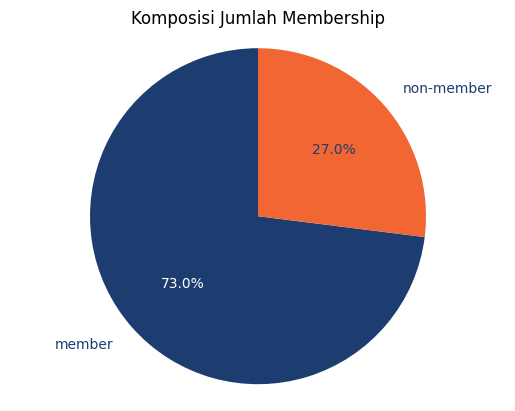

In [147]:
import matplotlib.pyplot as plt

persentase_membership_m = desimal_membership / len(df)

colors = ['#1D3D71', '#F26634', '#1D3D71']
fig, ax = plt.subplots()
pie, texts, autotexts = ax.pie (persentase_membership_m,
        labels=persentase_membership_m.index,
        autopct = '%1.1f%%', colors = colors,
        startangle=90, textprops ={'color': 'white'},
        labeldistance = 1.15)

texts[0].set_color(colors[2])
texts[1].set_color(colors[2])
# texts[2].set_color(colors[2])

autotexts[1].set_color('#1D3D71')

ax.axis('equal')


plt.title('Komposisi Jumlah Membership')
plt.show()

## Perhitungan Kepuasan Member

Selanjutnya saya akan mengukur tingkat kepuasan member dengan nilai sebagai berikut:

1 = Sangat Tidak Puas

2 = Tidak Puas

3 = Netral

4 = Puas

5 = Sangat Puas



In [148]:
# Saya akan mencari tahu apakah member cenderung puas atau tidak?
sangat_puas = df[df['membership'] == 'member']['skor_kepuasan'].eq(5).sum()
puas = df[df['membership'] == 'member']['skor_kepuasan'].eq(4).sum()
netral = df[df['membership'] == 'member']['skor_kepuasan'].eq(3).sum()
tidak_puas = df[df['membership'] == 'member']['skor_kepuasan'].eq(2).sum()
sangat_tidak_puas = df[df['membership'] == 'member']['skor_kepuasan'].eq(1).sum()

print("Member yang SANGAT PUAS berjumlah", sangat_puas, "Member")
print("Member yang PUAS berjumlah", puas, "Member")
print("Member yang NETRAL berjumlah", netral, "Member")
print("Member yang TIDAK PUAS berjumlah", tidak_puas, "Member")
print("Member yang SANGAT TIDAK PUAS berjumlah", sangat_tidak_puas, "Member")


Member yang SANGAT PUAS berjumlah 4734 Member
Member yang PUAS berjumlah 4300 Member
Member yang NETRAL berjumlah 4493 Member
Member yang TIDAK PUAS berjumlah 6201 Member
Member yang SANGAT TIDAK PUAS berjumlah 5801 Member


Berikut visualisasinya

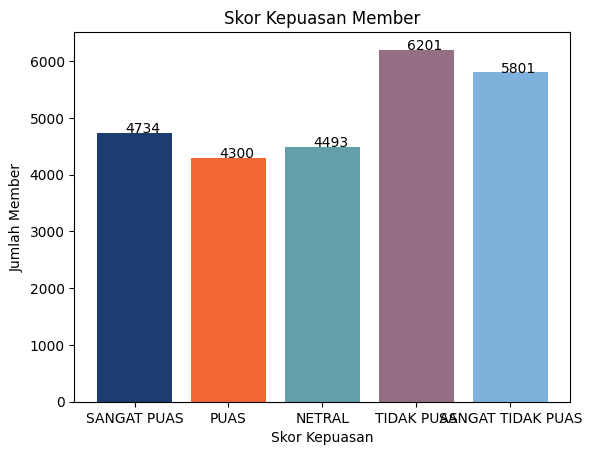

In [149]:
labels = ['SANGAT PUAS', 'PUAS', 'NETRAL' , 'TIDAK PUAS' , 'SANGAT TIDAK PUAS']
values = [sangat_puas , puas , netral , tidak_puas , sangat_tidak_puas]
colors = ['#1D3D71' , '#F26634' , '#639FAB' , '#946E83' , '#7EB2DD']

fig, ax = plt.subplots()
bars = ax.bar(labels, values, color = colors)

for bar, value in zip(
    bars, values):
  plt.text(bar.get_x() + bar.get_width() / 2 - 0.1,
           bar.get_height() + 0.1, str(value),
           color = 'black')

plt.title('Skor Kepuasan Member')
plt.xlabel('Skor Kepuasan')
plt.ylabel('Jumlah Member')
plt.show()

Ternyata sangat banyak yang tidak puas
Saya akan cek central tendency nya

## Central tendency skor kepuasan member

In [150]:
# Describe skor kepuasam member
df[df['membership'] == 'member']['skor_kepuasan'].describe()

count    25529.000000
mean         2.841944
std          1.427272
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: skor_kepuasan, dtype: float64

Benar saja, angka rata-rata kepuasan di bawah 3. Dengan kata lain rata-rata member di bawah berada di tidak puas dan netral

## Central tendency kepuasan member berdasarkan kategori jarak

Sekarang saya akan lebih spesifik membandingkan skor kepuasan dengan kategori jarak penerbangan.

Sebelumnya saya perlu tahu terlebih dahulu, ada kategori apa sajakah itu?

Berikut adalah rinciannya:

In [151]:
print('Kategori jarak yang ada dalam data:\n', df['kategori_jarak'].unique())

Kategori jarak yang ada dalam data:
 ['Short' 'Medium' 'Long']


Sekarang saya akan lihat central tendency skor kepuasan terhadap jarak tempuh

In [152]:
df[df['membership'] == 'member'].groupby('kategori_jarak')['skor_kepuasan'].describe()

,count,mean,std,min,25%,50%,75%,max
kategori_jarak,,,,,,,,
Long,7172.0,2.653653,1.417743,1.0,1.0,2.0,4.0,5.0
Medium,15472.0,2.929033,1.427182,1.0,2.0,3.0,4.0,5.0
Short,2885.0,2.842981,1.406576,1.0,2.0,3.0,4.0,5.0


Sekilas saya bisa lihat data skor terdistribusi dengan normal, dengan rata-rata skor paling tinggi adalah pada kategori jarak menegah

# Inferensial

## Pengaruh kategori jarak terhadap kepuasan member

Saya sudah masuk ke tahapan terakhir untuk poin menguji apakah ada hubungan erat antara jarak dengan skor kepuasan.

Hipotesa saya, ada pengaruh antara ke dua hal tersebut.

H0 = Tidak ada perbedaan signifikan antara jarak dan skor kepuasan member
H1 = Ada perbedaan sginifikan antar keduanya.

Saya akan melakukan pengujian dengan Anova yang cocok untuk menganalisa 2 atau lebih hubungan yang bersifat kategorik. Skor adalah kategorik, begitupun dengan kategori jarak. Bukan jaraknya.

Berikut pengujiannya

In [153]:
anovatest_jarak = f_oneway(df['skor_kepuasan'][df['kategori_jarak'] == 'Short'],
                           df['skor_kepuasan'][df['kategori_jarak'] == 'Medium'],
                           df['skor_kepuasan'][df['kategori_jarak'] == 'Long'])
print(f"Hasil uji ANOVA yang dijalankan adalah sebagai berikut:\n\nStatistik uji F: {anovatest_jarak.statistic}\np-value: {anovatest_jarak.pvalue}")

alpha = 0.05
if anovatest_jarak.pvalue < alpha:
  print("Perbedaan itu ada sginifikan di antara 2 kategori tersebut (Tolak H0)")
else:
  print("Tidak ada perbedaan signifikan (Terima H0)")

Hasil uji ANOVA yang dijalankan adalah sebagai berikut:

Statistik uji F: 114.68042357854482
p-value: 2.2781954785764227e-50
Perbedaan itu ada sginifikan di antara 2 kategori tersebut (Tolak H0)


Diketahui bahwa p-value jauh berada di bawah alpha sehingga Hipotesis 0 ditolak. Dengan kata lain ada perbedaan yang sangat signifikan antara jarak dan kepuasan terhadap pelayanan F&B

# Deskriptif

## Komposisi member berdasarkan generasi
Saya akan masuk ke key result no 2 yaitu untuk mencari tahu mungkin saja ada pengaruh antara generasi dengan skor kepuasan member.

Sebelum melakukan pengujian, saya harus tahu terlebih dahulu apa saja generasi yang ada di member?



In [124]:
print('Kategori generasi yang ada dalam data:\n', df['generasi'].unique())

Kategori generasi yang ada dalam data:
 ['Gen X' 'Boomer' 'Silent' 'Gen Z' 'Millennial' 'Greatest' 'NBK']


Ok, NBK muncul lagi dengan jumlah yang sama. Saya tidak akan menghapus datanya. Sesuai arahan klien, saya akan merubah menjai kategori Millennial

In [125]:
# atas arahan klien, kategori NBK, dianggap bukan Millennial
# ganti NBK menjadi Member
df['generasi'] = df['generasi'].str.replace('NBK','Millennial')
df['generasi'].unique()

array(['Gen X', 'Boomer', 'Silent', 'Gen Z', 'Millennial', 'Greatest'],
      dtype=object)

Ok, NBK sudah hilang dan masuk ke dalam kategori Millennial.

Selanjutnya, saya butuh tahu komposisi jumlah member dari tiap generasi yang ada.

In [126]:
# perbandingan Member dan Non Member
komposisi_generasi = df['generasi'].value_counts()
desimal_generasi = komposisi_generasi / len(df)
persentase_generasi = desimal_generasi.map(lambda x: f"{x:.2%}")
print('Komposisi Jumlah generasi adalah:\n', komposisi_generasi, '\n\nDalam persentase:\n' , persentase_generasi)

Komposisi Jumlah generasi adalah:
 Boomer        16367
Gen X         11088
Millennial     4982
Silent         1697
Gen Z           827
Greatest          2
Name: generasi, dtype: int64 

Dalam persentase:
 Boomer        46.81%
Gen X         31.71%
Millennial    14.25%
Silent         4.85%
Gen Z          2.37%
Greatest       0.01%
Name: generasi, dtype: object


## Perhitungan kepuasan member berdasarkan generasi

enerasi boomer secara signifikan mendominasi, disusul oleh gen X. Itu artinya member dari klien saya mayoritas berumur di atas 40 tahun.

Selanjutnya, saya akan bedah tiap tingkatan skor dan generasinya.

In [127]:
gen_sangat_puas = df.loc[df['membership'] == 'member'].loc[df['skor_kepuasan'] == 5].groupby('generasi')['skor_kepuasan'].count()
a = gen_sangat_puas / sangat_puas
gen_sangat_puas_percent = a.map(lambda x: f"{x:.2%}")

gwn_puas = df.loc[df['membership'] == 'member'].loc[df['skor_kepuasan'] == 4].groupby('generasi')['skor_kepuasan'].count()
a = gwn_puas / puas
gwn_puas_percent = a.map(lambda x: f"{x:.2%}")

gen_netral = df.loc[df['membership'] == 'member'].loc[df['skor_kepuasan'] == 3].groupby('generasi')['skor_kepuasan'].count()
a = gen_netral / netral
gen_netral_percent = a.map(lambda x: f"{x:.2%}")

gen_tidak_puas = df.loc[df['membership'] == 'member'].loc[df['skor_kepuasan'] == 2].groupby('generasi')['skor_kepuasan'].count()
a = gen_tidak_puas / tidak_puas
gen_tidak_puas_percent = a.map(lambda x: f"{x:.2%}")

gen_sangat_tidak_puas = df.loc[df['membership'] == 'member'].loc[df['skor_kepuasan'] == 1].groupby('generasi')['skor_kepuasan'].count()
a = gen_sangat_tidak_puas / sangat_tidak_puas
gen_sangat_tidak_puas_percent = a.map(lambda x: f"{x:.2%}")

print(
    'persentase generasi yang memberi skor 5:\n',gen_sangat_puas_percent,
    '\n\npersentase generasi yang memberi skor 4:\n',gwn_puas_percent,
    '\n\npersentase generasi yang memberi skor 3:\n',gen_netral_percent,
    '\n\npersentase generasi yang memberi skor 2:\n',gen_tidak_puas_percent,
    '\n\npersentase generasi yang memberi skor 1:\n',gen_sangat_tidak_puas_percent)

persentase generasi yang memberi skor 5:
 generasi
Boomer        48.92%
Gen X         31.92%
Gen Z          1.82%
Millennial    12.40%
Silent         4.94%
Name: skor_kepuasan, dtype: object 

persentase generasi yang memberi skor 4:
 generasi
Boomer        50.77%
Gen X         30.86%
Gen Z          1.47%
Millennial    12.05%
Silent         4.86%
Name: skor_kepuasan, dtype: object 

persentase generasi yang memberi skor 3:
 generasi
Boomer        50.03%
Gen X         31.74%
Gen Z          1.22%
Millennial    11.42%
Silent         5.59%
Name: skor_kepuasan, dtype: object 

persentase generasi yang memberi skor 2:
 generasi
Boomer        49.83%
Gen X         32.08%
Gen Z          1.35%
Millennial    12.05%
Silent         4.69%
Name: skor_kepuasan, dtype: object 

persentase generasi yang memberi skor 1:
 generasi
Boomer        47.15%
Gen X         32.01%
Gen Z          1.22%
Greatest       0.03%
Millennial    14.79%
Silent         4.79%
Name: skor_kepuasan, dtype: object


Ternyata data ini cukup signifikan terdistribusi dengan normal. Urutan sampel terbesar mencerminkan persentase skor yang ada

## Central tendency skor kepuasan member berdasarkan generasi

Saya akan cek lebih jauh dari central tendencynya

In [128]:
df[df['membership'] == 'member'].groupby('generasi')['skor_kepuasan'].describe()

,count,mean,std,min,25%,50%,75%,max
generasi,,,,,,,,
Boomer,12572.0,2.861199,1.416821,1.0,2.0,3.0,4.0,5.0
Gen X,8110.0,2.833046,1.429131,1.0,2.0,3.0,4.0,5.0
Gen Z,359.0,3.025070,1.471113,1.0,2.0,3.0,4.0,5.0
Greatest,2.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
Millennial,3223.0,2.760782,1.459208,1.0,1.0,3.0,4.0,5.0
Silent,1263.0,2.865400,1.414527,1.0,2.0,3.0,4.0,5.0


Terlihat rentang min - max begitupun median dan q1,13 tertitik dengan rapi. Artinya data ini distribusinya sangat normal

## Rata-rata skor kepuasan member berdasarkan generasi setiap harinya (September 2022)

Saya akan cek lebih detail rata-rata skor setiap harinya pada bulan September berdasarkan generasi.

In [129]:
generasi_tanggal = df.groupby(['tanggal' , 'generasi'])
avg_generasi_tanggal = generasi_tanggal['skor_kepuasan'].mean()
avg_generasi_tanggal

tanggal  generasi  
1        Boomer        2.907563
         Gen X         2.827128
         Gen Z         3.375000
         Greatest      1.000000
         Millennial    2.528302
                         ...   
30       Boomer        3.020115
         Gen X         2.945607
         Gen Z         3.533333
         Millennial    2.710000
         Silent        3.031250
Name: skor_kepuasan, Length: 152, dtype: float64

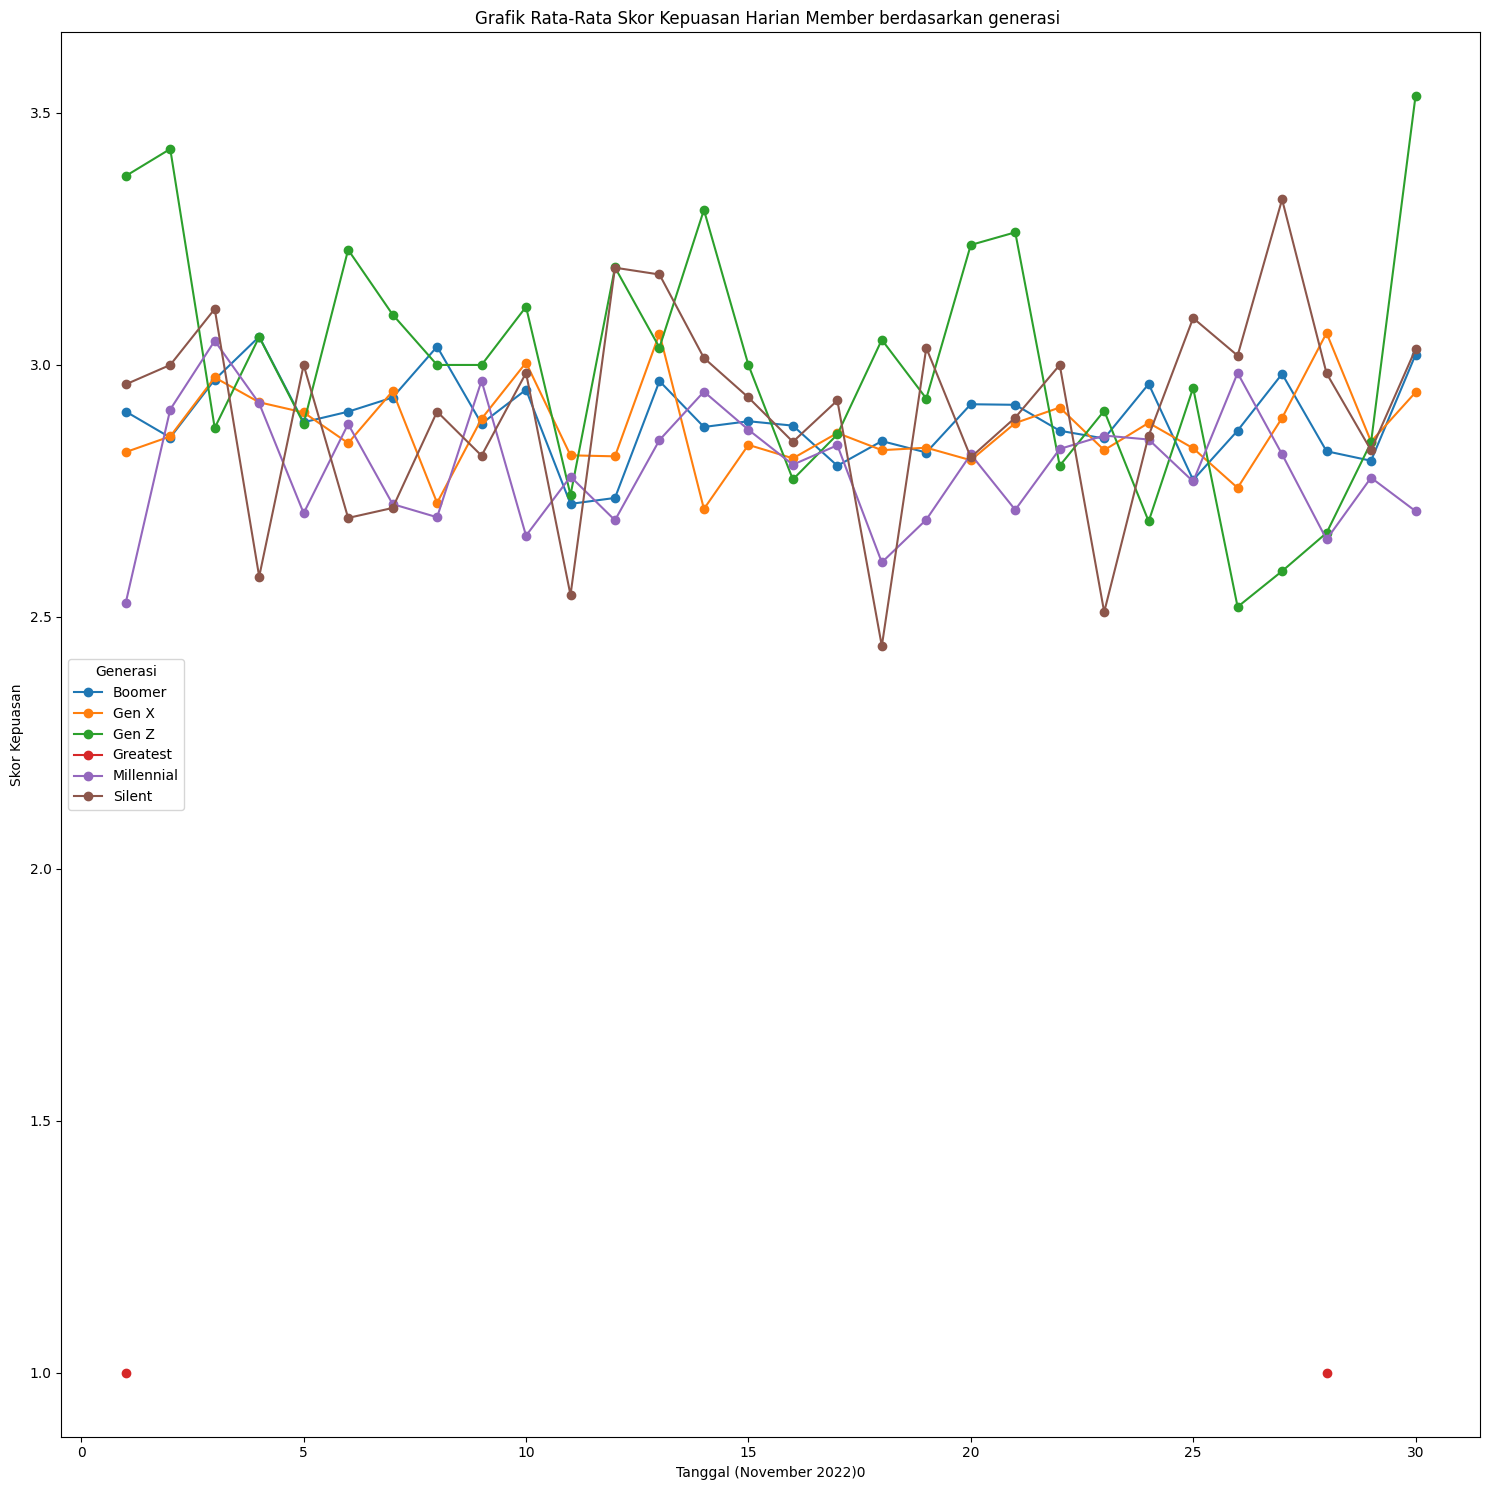

In [130]:
avg_generasi_tanggal.unstack().plot(marker='o', figsize = (15,15))

plt.title('Grafik Rata-Rata Skor Kepuasan Harian Member berdasarkan generasi ')
plt.xlabel('Tanggal (November 2022)0')
plt.ylabel('Skor Kepuasan')
plt.legend(title='Generasi', loc='center left')
plt.tight_layout()
plt.show()

Dari grafik di atas, saya tidak bisa simpulkan sebenarnya bahwa generasi ini berkaitan erat dengan skor kepuasan.

*   List item
*   List item



# Inferensial

## Pengaruh kepuasan member berdasarkan generasi terhadap skor kepuasan

Tahap akhir dari analisis ini, saya akan menguji keterkaitan antara generasi dengan skor kepuasan.

Kembali saya akan menggunakan Anova untuk menguji ini dengan hipotesa sebagai berikut:

H0: Tidak ada perbedaan antara generasi dengan skor kepuasan member
H1: Terdapat perbedaan diantaranya


In [131]:
from scipy.stats import f_oneway

anovatest_generasi = f_oneway(df['skor_kepuasan'][df['generasi'] == 'Silent'],
                     df['skor_kepuasan'][df['generasi'] == 'Boomer'],
                     df['skor_kepuasan'][df['generasi'] == 'Gen X'],
                     df['skor_kepuasan'][df['generasi'] == 'Millennial'],
                     df['skor_kepuasan'][df['generasi'] == 'Gen Z'],
                     df['skor_kepuasan'][df['generasi'] == 'Greatest'])
print(f"Hasil uji ANOVA yang dijalankan adalah sebagai berikut:\n\nStatistik uji F: {anovatest_generasi.statistic}\np-value: {anovatest_generasi.pvalue}")

alpha = 0.05
if anovatest_generasi.pvalue < alpha:
  print("Perbedaan itu ada sginifikan di antara 2 kategori tersebut (Tolak H0)")
else:
  print("Tidak ada perbedaan signifikan (Terima H0)")

Hasil uji ANOVA yang dijalankan adalah sebagai berikut:

Statistik uji F: 5.620131160294129
p-value: 3.494448756343984e-05
Perbedaan itu ada sginifikan di antara 2 kategori tersebut (Tolak H0)


Diketahui bahwa p-value jauh berada di bawah alpha sehingga Hipotesis 0 ditolak. Dengan katalain ada perbedaan yang sangat signifikan antara generasi dan kepuasan terhadap pelayanan F&B

# Kesimpulan

Dari data-data tersebut di atas, saya bisa secara percaya diri menyimpulkan bahwa tidak ada pengaruh eksternal terhadap skor penilaian member.


Saya sudah membuktikan hubungannya dengan kategori jarak dan generasi, mungkin perjalanan jauh menghasilkan skor penilaian yang buruk, ternyata tidak. Atau mungkin semakin *mature* sesorang semakin jelek penilainnya, ternyata juga tidak.


Saya akan kembalikan ke klien untuk sama-sama kita melakukakn investigasi di tahap selanjutnya.

Sebelumnya, saya akan save terlebih dahulu output hasil olah data ini untuk divisualisasikan menggunakan Tableau

In [132]:
df.to_csv('output.csv')